# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
from tensorflow.python.ops.math_ops import TruncateMod
# Python ≥3.5 is required
import sys
assert sys.version_info>=(3,5)

import sklearn
assert sklearn.__version__>= '0.20'

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow ≥2.4 is required in this notebook
# Earlier 2.x versions will mostly work the same, but with a few bugs
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= '2.'

# common imports
import numpy as np
import os

# to make this notebook output stable
np.random.seed(42)
tf.random.set_seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID="deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dip=resolution)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
tf.__version__

'2.12.0'

In [3]:
assert tf.__version__ >= '2.4'

# throws assertion error as the current version is '2.12.0' which is getting compared to '2.4'

AssertionError: ignored

In [4]:
assert '2.12.0' >= '2.4'

AssertionError: ignored

In [6]:
assert '2.5' >= '2.4' ## this would work

Check sorting a list interger strings

In [7]:
lst = ['1', '4', '11', '78', '9', '53']
sorted(lst)

['1', '11', '4', '53', '78', '9']

In [8]:
lst.sort()
lst

['1', '11', '4', '53', '78', '9']

Is there any other way to make such comparsions?
- we can write a simple python code to do that, but is there any built-in way or method to quickly make such comparision

## Tensors and operations

### Tensors

In [9]:
tf.constant([9,8,10]) #vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 9,  8, 10], dtype=int32)>

In [10]:
tf.constant(3) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [11]:
tf.constant([[3,4,5], [7,8, 9]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 4, 5],
       [7, 8, 9]], dtype=int32)>

In [12]:
tf.expand_dims(tf.constant([[3,4,5], [7,8, 9]]), 0) # tensor

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[3, 4, 5],
        [7, 8, 9]]], dtype=int32)>

In [13]:
t = tf.constant([[1, 2, 3], [4, 5, 6]]) ##assign to variable
t

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [14]:
t.shape #shape

TensorShape([2, 3])

In [15]:
t.dtype #data type

tf.int32

In [16]:
t.ndim # dimension

2

In [17]:
t = tf.cast(t, dtype=tf.float32) #cast to float
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [18]:
t.dtype

tf.float32

In [19]:
#default float is 32
tf.constant([2., 5.6])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2. , 5.6], dtype=float32)>

### Indexing

In [20]:
#all
t[:,:]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [21]:
t[:, 0] #get 0th column

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 4.], dtype=float32)>

In [22]:
t[:, 1] # returns 1st column as a vector

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [23]:
# returns 1st column as a matrix with expanded axis
t[:, 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [24]:
t[tf.newaxis, :] #adding new axis to matrix at the beginning

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 2., 3.],
        [4., 5., 6.]]], dtype=float32)>

In [25]:
t[tf.newaxis]  #adding new axis to matrix at the beginning (1, 2, 3)

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 2., 3.],
        [4., 5., 6.]]], dtype=float32)>

In [26]:
t[:, tf.newaxis] #adding new axis to matrix at the position 1 (2, 1, 3)

<tf.Tensor: shape=(2, 1, 3), dtype=float32, numpy=
array([[[1., 2., 3.]],

       [[4., 5., 6.]]], dtype=float32)>

In [27]:
t[:,:, tf.newaxis] #adding new axis to matrix at the end (2, 3, 1)

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[1.],
        [2.],
        [3.]],

       [[4.],
        [5.],
        [6.]]], dtype=float32)>

### Ops

In [28]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [29]:
t //10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [30]:
t/2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]], dtype=float32)>

In [31]:
tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [32]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [33]:
tf.math.log(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.       , 0.6931472, 1.0986123],
       [1.3862944, 1.609438 , 1.7917595]], dtype=float32)>

In [34]:
tf.reduce_sum(t)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [35]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [36]:
tf.reduce_sum(t, axis=0) # sum along axis 0

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5., 7., 9.], dtype=float32)>

In [37]:
tf.reduce_sum(t, axis=1) # sum along axis 1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 6., 15.], dtype=float32)>

In [38]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [39]:
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### Using `keras.backend`

The Keras API has its own low-level API, located in keras.backend. It includes functions like `square()`, `exp()`, and `sqrt()`. In tf.keras, these functions generally just call
the corresponding TensorFlow operations.

In [40]:
K = keras.backend

In [41]:
K.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [42]:
K.exp(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

### From/To NumPy

In [43]:
a = np.array([2.,3., 4.])
a

array([2., 3., 4.])

In [44]:
tf.constant(a) #note the dtype is float64 which is what is default in Numpy

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 3., 4.])>

In [45]:
t.numpy() # convert tensor to numpy array

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [46]:
np.array(t) #alternate way

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [47]:
tf.square(a) ## 'a' numpy array

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4.,  9., 16.])>

In [48]:
np.square(t) ## dtype - float32, as t is created as tf tensor

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Conflicting Types

In [49]:
# operation adding float and int
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [50]:
# operation adding float32 and float64
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [51]:
# operation adding float32 and float32
try:
    tf.constant(2.) + tf.constant(40.)
except tf.errors.InvalidargumentError as ex:
    print(ex)

### Strings

In [52]:
tf.constant('i am learning')

<tf.Tensor: shape=(), dtype=string, numpy=b'i am learning'>

In [53]:
tf.constant('i am learning @ open school called YouTube')

<tf.Tensor: shape=(), dtype=string, numpy=b'i am learning @ open school called YouTube'>

In [54]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [55]:
u = tf.constant([ord(c) for c in 'café'])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [56]:
b = tf.strings.unicode_encode(u, 'UTF-8')
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [57]:
tf.strings.unicode_decode(b, 'UTF-8')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays

In [58]:
p = tf.constant(['Cafe', 'Café', 'Coffee', 'caffè', '咖啡'])

In [59]:
tf.strings.length(p)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 5, 6, 6, 6], dtype=int32)>

In [60]:
tf.strings.length(p, unit='UTF8_CHAR')

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 4, 6, 5, 2], dtype=int32)>

In [61]:
r = tf.strings.unicode_decode(p, 'UTF8')

### Ragged tensors

A ragged tensor is a special kind of tensor that represents a list of arrays of different
sizes. More generally, it is a tensor with one or more ragged dimensions, meaning
dimensions whose slices may have different lengths

In [62]:
# All the elements of the ragged tensor r are regular tensors.
print(r[1])

tf.Tensor([ 67  97 102 233], shape=(4,), dtype=int32)


In [63]:
print(r[:3])

<tf.RaggedTensor [[67, 97, 102, 101], [67, 97, 102, 233], [67, 111, 102, 102, 101, 101]]>


`tf.ragged` package contains several functions to create and manipulate ragged
tensors

In [64]:
r2 = tf.ragged.constant([[], [1, 2, 3], [35, 2]])
r2

<tf.RaggedTensor [[], [1, 2, 3], [35, 2]]>

In [65]:
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 101], [67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [], [1, 2, 3], [35, 2]]>

In [66]:
r.shape, r2.shape

(TensorShape([5, None]), TensorShape([3, None]))

In [67]:
tf.concat([r, r2], axis=1)

InvalidArgumentError: ignored

In [68]:
r3 = tf.ragged.constant([[], [2, 3], [23, 45, 98], [62], [12, 41]])
tf.concat([r, r3], axis=0)

<tf.RaggedTensor [[67, 97, 102, 101], [67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [], [2, 3], [23, 45, 98], [62],
 [12, 41]]>

In [69]:
tf.concat([r, r3], axis=1)

<tf.RaggedTensor [[67, 97, 102, 101], [67, 97, 102, 233, 2, 3],
 [67, 111, 102, 102, 101, 101, 23, 45, 98], [99, 97, 102, 102, 232, 62],
 [21654, 21857, 12, 41]]>

In [70]:
tf.strings.unicode_encode(r3, 'UTF-8')

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'', b'\x02\x03', b'\x17-b', b'>', b'\x0c)'], dtype=object)>

In [71]:
r.to_tensor() ##convert ragged tensor to regular tensor

<tf.Tensor: shape=(5, 6), dtype=int32, numpy=
array([[   67,    97,   102,   101,     0,     0],
       [   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse tensors

TensorFlow can also efficiently represent sparse tensors (i.e., tensors containing
mostly zeros).  create a tf.SparseTensor, specifying the indices and values of the
nonzero elements and the tensor’s shape. The indices must be listed in “reading
order” (from left to right, and top to bottom).

In [72]:
# creating a Sparse Tensor
s = tf.SparseTensor(indices=[[0,1], [1, 3], [3, 4]],
                    values=[19., 67., 23.],
                    dense_shape=(4, 5))
s

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 3]
 [3 4]], shape=(3, 2), dtype=int64), values=tf.Tensor([19. 67. 23.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([4 5], shape=(2,), dtype=int64))

convert a sparse tensor to a dense tensor (i.e., a regular tensor) using `tf.sparse.to_dense()`

In [73]:
# Convert Sparse to Dense
tf.sparse.to_dense(s)

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[ 0., 19.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 67.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 23.]], dtype=float32)>

you can multiply a sparse tensor by any scalar value, a

In [74]:
s2 = s * 2.0

**you cannot add a scalar value to a sparse tensor, as this would not return a sparse tensor**

In [75]:
try:
    s3 = s2 + 1
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [76]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
s4.shape

TensorShape([4, 2])

In [77]:
s.shape

TensorShape([4, 5])

In [78]:
tf.sparse.sparse_dense_matmul(s, s4) # shape mismatch error

InvalidArgumentError: ignored

In [79]:
tf.sparse.sparse_dense_matmul(tf.transpose(s4), s)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[   0.,  190.,    0., 2010., 1610.],
       [   0.,  380.,    0., 2680., 1840.]], dtype=float32)>

In [80]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], # out of order
                     values=[1., 2.],
                     dense_shape=[3,4])
s5

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [81]:
try:
  tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [82]:
s6 = tf.sparse.reorder(s5)
s6

SparseTensor(indices=tf.Tensor(
[[0 1]
 [0 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([2. 1.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [83]:
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets

### Variables

**Variables** are **mutable** tensor unlike tf.constant() which create immutable tensors. The regular cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by backpropagation.

In [84]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.], [7., 8., 9]])
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [85]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]], dtype=float32)>

In [86]:
v[0,1].assign(90)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 2., 90.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]], dtype=float32)>

In [87]:
v[:, 1].assign(0)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 2.,  0.,  6.],
       [ 8.,  0., 12.],
       [14.,  0., 18.]], dtype=float32)>

In [88]:
try:
    v[1]=[7., 8., 9]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [89]:
v.scatter_nd_update(indices=[[0,2], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[  2.,   0., 100.],
       [  8.,   0., 200.],
       [ 14.,   0.,  18.]], dtype=float32)>

In [90]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 4.,  5.,  6.],
       [ 1.,  2.,  3.],
       [14.,  0., 18.]], dtype=float32)>

## Custom loss function

Let's start by loading and preparing the California housing dataset. We first load it, then split it into a training set, a validation set and a test set, and finally we scale it:

In [91]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(return_X_y=True)
print(f"X shape:{X.shape}, y shape:{y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print(f"X_train shape:{X_train_scaled.shape}, X_valid shape:{X_valid_scaled.shape}, X_test shape:{X_test_scaled.shape}")

X shape:(20640, 8), y shape:(20640,)
X_train shape:(11610, 8), X_valid shape:(3870, 8), X_test shape:(5160, 8)


In [92]:
# define huber loss

def huber_loss(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5

  return tf.where(is_small_error, squared_loss, linear_loss)

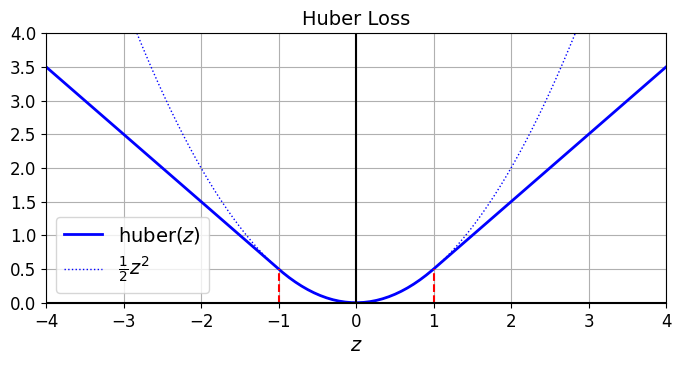

In [93]:
plt.figure(figsize=(8,3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_loss(0, z), 'b-', linewidth=2, label='huber($z$)')
plt.plot(z, z**2 / 2, 'b:', linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_loss(0., -1)], 'r--')
plt.plot([1, 1], [0, huber_loss(0., 1.)], 'r--')
plt.gca().axhline(y=0,color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid()
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber Loss", fontsize=14)
plt.show()

In [94]:
input_shape = X_train.shape[1:]

# Defining a model
model = tf.keras.Sequential([
    keras.layers.Dense(30, activation='selu',
                       kernel_initializer='lecun_normal',
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss=huber_loss,
              optimizer='nadam',
              metrics=['mae', 'mse'])

In [96]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 7ms/step - loss: 0.6126 - mae: 0.9671 - mse: 2.0218 - val_loss: 0.2252 - val_mae: 0.5102 - val_mse: 1.9936
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2063 - mae: 0.4968 - mse: 0.4992 - val_loss: 0.1942 - val_mae: 0.4757 - val_mse: 0.6104


In [97]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.1980 - mae: 0.4882 - mse: 0.4682


[0.19795940816402435, 0.48822590708732605, 0.4682220220565796]

## Saving/Loading Models with Custom Objects

**Saving the entire model**

An entire model can be saved in three different file formats (the new .keras format and two legacy formats: SavedModel, and HDF5). Saving a model as path/to/model.keras automatically saves in the latest format.

**[Saving custom objects](https://www.tensorflow.org/tutorials/keras/save_and_load/)**

If you are using the SavedModel format, you can skip custom_objects section. The key difference between high-level .keras/HDF5 formats and the low-level SavedModel format is that the .keras/HDF5 formats uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code. However, debugging low-level SavedModels can be more difficult as a result, and we recommend using the high-level .keras format instead due to its name-based, Keras-native nature.

### Save model as `.keras` format

In [98]:
model.save('my_model_custom_loss_huber.keras')

In [100]:
#load model and try evaluation
model_dotkerasformat = keras.models.load_model('my_model_custom_loss_huber.keras')
model_dotkerasformat.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.1980 - mae: 0.4882 - mse: 0.4682


[0.19795940816402435, 0.48822590708732605, 0.4682220220565796]

In [101]:
# train model
model_dotkerasformat.fit(X_train_scaled, y_train,
                             epochs=2,
                             validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1974 - mae: 0.4846 - mse: 0.4589 - val_loss: 0.1831 - val_mae: 0.4607 - val_mse: 0.4621
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1941 - mae: 0.4800 - mse: 0.4495 - val_loss: 0.1784 - val_mae: 0.4572 - val_mse: 0.4094


### Legacy SavedModel format

In [102]:
model.save('my_model_custom_loss_huber')

In [104]:
#load model and try evaluation
model_saveModelformat = keras.models.load_model('my_model_custom_loss_huber')
model_saveModelformat.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.1980 - mae: 0.4882 - mse: 0.4682


[0.19795940816402435, 0.48822590708732605, 0.4682220220565796]

In [146]:
!cp -r 'my_model_custom_loss_huber' '/content/drive/MyDrive/ColabNotebooks/HML/'

In [105]:
# train model
model_saveModelformat.fit(X_train_scaled, y_train,
                             epochs=2,
                             validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1978 - mae: 0.4855 - mse: 0.4604 - val_loss: 0.1809 - val_mae: 0.4579 - val_mse: 0.4233
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1936 - mae: 0.4787 - mse: 0.4482 - val_loss: 0.1922 - val_mae: 0.4716 - val_mse: 0.7976


### Legacy Format - HDF5 (.h5) format

In [106]:
model.save('my_model_custom_loss_huber.h5')

In [108]:
#load model and try evaluation
model_hdf5fromat = keras.models.load_model('my_model_custom_loss_huber.h5')
model_hdf5fromat.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.1980 - mae: 0.4882 - mse: 0.4682


[0.19795940816402435, 0.48822590708732605, 0.4682220220565796]

In [109]:
# train model
model_hdf5fromat.fit(X_train_scaled, y_train,
                             epochs=2,
                             validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1974 - mae: 0.4846 - mse: 0.4589 - val_loss: 0.1831 - val_mae: 0.4607 - val_mse: 0.4621
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1941 - mae: 0.4800 - mse: 0.4495 - val_loss: 0.1784 - val_mae: 0.4572 - val_mse: 0.4094


### Defining custom objects while loading model using custom functions
Is it required to define custom objects when loading model that used custom functions? **NO**, as observed in below experiment

In [110]:
model_custom_object_loss = keras.models.load_model('my_model_custom_loss_huber.keras',
                                                   custom_objects={'huber_loss':huber_loss})

In [111]:
model_custom_object_loss.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.1980 - mae: 0.4882 - mse: 0.4682


[0.19795940816402435, 0.48822590708732605, 0.4682220220565796]

In [112]:
# train model
model_custom_object_loss.fit(X_train_scaled, y_train,
                             epochs=2,
                             validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1974 - mae: 0.4846 - mse: 0.4589 - val_loss: 0.1831 - val_mae: 0.4607 - val_mse: 0.4621
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1941 - mae: 0.4800 - mse: 0.4495 - val_loss: 0.1784 - val_mae: 0.4572 - val_mse: 0.4094


With the current implementation, any error between –1 and 1 is considered “small.” But what if you want a different threshold? One solution is to create a function that creates a configured loss function:

In [240]:
def create_huber(threshold=1.0):
    def huber_loss(y_true, y_pred):
        error= y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2

        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_loss

In [114]:
model.compile(loss=create_huber(2.),
              optimizer='nadam',
              metrics=['mae'])

In [115]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.2243 - mae: 0.4902 - val_loss: 0.2118 - val_mae: 0.4658
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2187 - mae: 0.4839 - val_loss: 0.2252 - val_mae: 0.4769


In [116]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2150 - mae: 0.4829


[0.2149830460548401, 0.4828616976737976]

In [117]:
model.save('my_model_custom_loss_parameterized.h5')

In [119]:
model_loadhdf5 = keras.models.load_model('my_model_custom_loss_parameterized.h5')
model_loadhdf5.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.1916 - mae: 0.4829


[0.19164715707302094, 0.4828616976737976]

In [120]:
model_loadhdf5.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 8),
    'units': 30,
    'activation': 'selu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'LecunNormal',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializ

In [121]:
model_loadhdf5.get_compile_config()

{'optimizer': {'module': 'keras.optimizers.experimental',
  'class_name': 'Nadam',
  'config': {'name': 'Nadam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07},
  'registered_name': None},
 'loss': {'module': 'keras.losses',
  'class_name': 'function',
  'config': 'huber',
  'registered_name': 'huber'},
 'metrics': [[{'module': 'keras.metrics',
    'class_name': 'MeanMetricWrapper',
    'config': {'name': 'mae',
     'dtype': 'float32',
     'fn': {'module': 'keras.losses',
      'class_name': 'function',
      'config': 'mean_absolute_error',
      'registered_name': 'mean_absolute_error'}},
    'registered_name': None}]],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'ste

In [122]:
model_loadhdf5_custom_object = keras.models.load_model('my_model_custom_loss_parameterized.h5',
                                                       custom_objects={'huber_loss': create_huber(2.)})

In [123]:
model_loadhdf5_custom_object.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2150 - mae: 0.4829


[0.2149830460548401, 0.4828616976737976]

**We observe that custom object defining is not mandatory when using custom functions. If you are loading the saved model in different session and want to specify the custom objects, you need to have these defined also in the session**

### Subclassing Loss Metric and Custom objects.
Is custom objects required to be defined while loading model?  **YES**

In [133]:
class HuberLoss(keras.losses.Loss):

    def __init__(self, threshold=1.0, **kwargs):
        self.threshold=threshold
        super().__init__(**kwargs)
    ##call(): Contains the logic for loss calculation using y_true, y_pred
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = error < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'threshold':self.threshold}

In [134]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='selu', kernel_initializer="lecun_normal", input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [135]:
model.compile(loss=HuberLoss(2.),
              optimizer='nadam',
              metrics=['mae'])

In [136]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.8469 - mae: 0.9843 - val_loss: 0.4623 - val_mae: 0.6278
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2539 - mae: 0.5259 - val_loss: 0.3702 - val_mae: 0.5735


In [137]:
model.save('my_model_custom_loss_subclassed.keras') #.keras format
model.save('my_model_custom_loss_subclassed.h5') # legacy format h5

In [130]:
model_customloss_subclassed_dotkeras = keras.models.load_model('my_model_custom_loss_subclassed.keras')

ValueError: ignored

We observe error, so specifying custom object is necessary we using a subclassed loss function

In [138]:
model_customloss_subclassed_dotkeras = keras.models.load_model('my_model_custom_loss_subclassed.keras',
                                                               custom_objects={'HuberLoss':HuberLoss})

In [139]:
model_customloss_subclassed_dotkeras.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.2398 - mae: 0.5181


[0.23983554542064667, 0.5180786848068237]

In [140]:
model_customloss_subclassed_h5 = keras.models.load_model('my_model_custom_loss_subclassed.h5',
                                                               custom_objects={'HuberLoss':HuberLoss})

model_customloss_subclassed_h5.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.2398 - mae: 0.5181


[0.23983554542064667, 0.5180786848068237]

In [142]:
model.save('my_model_custom_loss_subclassed') #legacy savedModel

In [147]:
!cp -r 'my_model_custom_loss_subclassed'  '/content/drive/MyDrive/ColabNotebooks/HML'

In [144]:
model_customloss_subclassed_savedModel = keras.models.load_model('my_model_custom_loss_subclassed',
                                                                 custom_objects={'HuberLoss':HuberLoss})

In [145]:
model_customloss_subclassed_savedModel.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.2398 - mae: 0.5181


[0.23983554542064667, 0.5180786848068237]

In [148]:
model_customloss_subclassed_savedModel.loss.threshold

2.0

## Other Custom Functions
Custom Activation Functions, Initializers, Regularizers, and Constraints

In [149]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [209]:
## define custom functions
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

[]

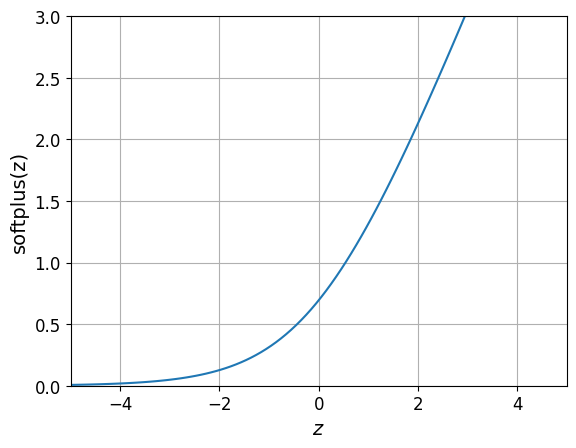

In [164]:
z = np.linspace(-5, 5, 100)
f_z = my_softplus(z)

plt.plot(z, f_z)
plt.axis([-5, 5, 0, 3])
plt.ylabel('softplus(z)')
plt.xlabel('$z$')
plt.grid()
plt.plot()

In [210]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [168]:
# zeros_like function will make all 0
tf.zeros_like([1,1,1])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 0], dtype=int32)>

In [211]:
# Define layer with custom function
myDenselayer = tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

In [212]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
      tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)
])

In [213]:
model.compile(loss="mse", optimizer='nadam', metrics=['mae'])

In [214]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 1.9595 - mae: 0.9574 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.6103 - mae: 0.5229 - val_loss: inf - val_mae: inf


In [198]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 1.8900 - mae: 0.5403


[1.8900423049926758, 0.5402973890304565]

In [199]:
model.save('model_layer_custom_fn.keras')
model.save('model_layer_custom_fn.h5')
model.save('model_layer_custom_fn')

In [226]:
!cp -r  'model_layer_custom_fn' '/content/drive/MyDrive/ColabNotebooks/HML'

In [200]:
model_layer_custom_fn_dotkeras = tf.keras.models.load_model('model_layer_custom_fn.keras')

TypeError: ignored

We observe that model loading failed due to unknown functions. So defining custom_objects is must when it comes to custom function used in model layers

In [201]:
model_layer_custom_fn_dotkeras = keras.models.load_model(
    "model_layer_custom_fn.keras",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [202]:
model_layer_custom_fn_dotkeras.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.8900 - mae: 0.5403


[1.8900423049926758, 0.5402973890304565]

Subclassing

If a function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class, such as keras.regularizers.Regularizer, keras.constraints.Constraint, keras.initializers.Initializer, or keras.layers.Layer (for any layer, including activation functions)

In [216]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor=factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {'factor':self.factor}

Note that you must implement the call() method for losses, layers (including activation functions), and models, or the ```__call__()``` method for regularizers, initializers, and constraints.

In [215]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [217]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
      tf.keras.layers.Dense(1, activation=my_softplus,
                            kernel_initializer=my_glorot_initializer,
                            kernel_regularizer=MyL1Regularizer(0.01),
                            kernel_constraint=my_positive_weights)
])

In [218]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [220]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5385 - mae: 0.5076 - val_loss: 1.8651 - val_mae: 0.5095
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5074 - mae: 0.4947 - val_loss: 1.5077 - val_mae: 0.5007


In [221]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.4985 - mae: 0.4894


[0.4984534978866577, 0.4893927574157715]

In [223]:
model.save("my_model_layer_with_custom_fns_subclass.keras")
model.save("my_model_layer_with_custom_fns_subclass.h5")
model.save("my_model_layer_with_custom_fns_subclass")

In [227]:
!cp -r 'my_model_layer_with_custom_fns_subclass' '/content/drive/MyDrive/ColabNotebooks/HML'

In [224]:
my_model_layer_with_custom_fns_subclass_dot_keras = tf.keras.models.load_model("my_model_layer_with_custom_fns_subclass.keras",
                                                                               custom_objects={"MyL1Regularizer": MyL1Regularizer,
                                                                                               "my_positive_weights": my_positive_weights,
                                                                                               "my_glorot_initializer": my_glorot_initializer,
                                                                                               "my_softplus": my_softplus})

In [225]:
my_model_layer_with_custom_fns_subclass_dot_keras.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.4985 - mae: 0.4894


[0.4984534978866577, 0.4893927574157715]

## Custom Metrics

Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy) are used by Gradient Descent to train a model, so they must be differentiable (at least where they are evaluated), and their gradients should not be 0 everywhere. It’s OK if they are not easily interpretable by humans.

In contrast, metrics (e.g., accuracy) are used to evaluate a model: they must be more easily interpretable, and they can be non-differentiable or have 0 gradients everywhere.

In most cases, defining a custom metric function is exactly the same as defining a custom loss function.

In [233]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [246]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [247]:
model.compile(loss='mse',
              optimizer='nadam',
              metrics=[create_huber(2.0)])

In [248]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 1.9318 - huber_loss: 0.8119
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5090 - huber_loss: 0.2382


In [249]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4697 - huber_loss: 0.2294


[0.4696834683418274, 0.22937245666980743]

In [250]:
model.save('model_custom_metric_fn.keras')
model.save('model_custom_metric_fn.h5')
model.save('model_custom_metric_fn')

In [260]:
!cp -r 'model_custom_metric_fn' '/content/drive/MyDrive/ColabNotebooks/HML'

.keras

In [261]:
model_custom_metric_fn_dot_keras = tf.keras.models.load_model('model_custom_metric_fn.keras')

ValueError: ignored

In [252]:
model_custom_metric_fn_dot_keras = tf.keras.models.load_model('model_custom_metric_fn.keras',
                                                              custom_objects={'huber_loss':create_huber(2.0)})
model_custom_metric_fn_dot_keras.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.4697 - huber_loss: 0.2294


[0.4696834683418274, 0.22937245666980743]

.h5

In [253]:
model_custom_metric_fn_h5 = tf.keras.models.load_model('model_custom_metric_fn.h5',
                                                              custom_objects={'huber_loss':create_huber(2.0)})
model_custom_metric_fn_h5.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.4697 - huber_loss: 0.2294


[0.4696834683418274, 0.22937245666980743]

SavedModel

In [254]:
model_custom_metric_fn = tf.keras.models.load_model('model_custom_metric_fn',
                                                              custom_objects={'huber_loss':create_huber(2.0)})
model_custom_metric_fn.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 2s 10ms/step - loss: 0.4697 - huber_loss: 0.2294


[0.4696834683418274, 0.22937245666980743]

**Note**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:
* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the _batch size_ (not the sum of weights, so the batch loss is _not_ the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [255]:
model.compile(loss=create_huber(2.0),
              optimizer='nadam',
              metrics=[create_huber(2.0)])

In [256]:
sample_weight=np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.1127 - huber_loss: 0.2281
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1091 - huber_loss: 0.2211


In [257]:
history.history.items()

dict_items([('loss', [0.11267627030611038, 0.10909941047430038]), ('huber_loss', [0.22806185483932495, 0.22108982503414154])])

In [259]:
history.history['loss'][0], history.history['huber_loss'][0] * sample_weight.mean()

(0.11267627030611038, 0.11317500703428972)

### Streaming metrics

 Suppose the model made five positive predictions in the first batch, four of which were correct: that’s 80% precision. Then suppose the model made three positive predictions in the second batch, but they were all incorrect: that’s 0% precision for the second batch. If you just compute the mean of these two precisions, you get 40%.

But wait a second—that’s not the model’s precision over these two batches! Indeed, there were a total of four true positives (4 + 0) out of eight positive predictions (5 + 3), so the overall precision is 50%, not 40%. What we need is an object that can keep track of the number of true positives and the number of false positives and that can compute their ratio when requested.

This is precisely what the keras.metrics.Precision class does